<a href="https://colab.research.google.com/github/n-nick-2511/DeepLearning2sem/blob/main/competition_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q opendatasets
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import opendatasets as od
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
import os, random, shutil
from PIL import ImageFile
import zipfile
ImageFile.LOAD_TRUNCATED_IMAGES = True

od.download(
    "https://www.kaggle.com/competitions/wind-turbine-damage-challenges")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nnicki
Your Kaggle Key: ··········
Extracting archive ./wind-turbine-damage-challenges/wind-turbine-damage-challenges.zip to ./wind-turbine-damage-challenges


In [ ]:
!pip install ultralytics
from ultralytics import YOLO
# import squarify
# import matplotlib.pyplot as plt
# import cv2
# import os
# import random
# import pandas as pd
# import matplotlib.image as mpimg
# import seaborn as sns
# import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 765.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


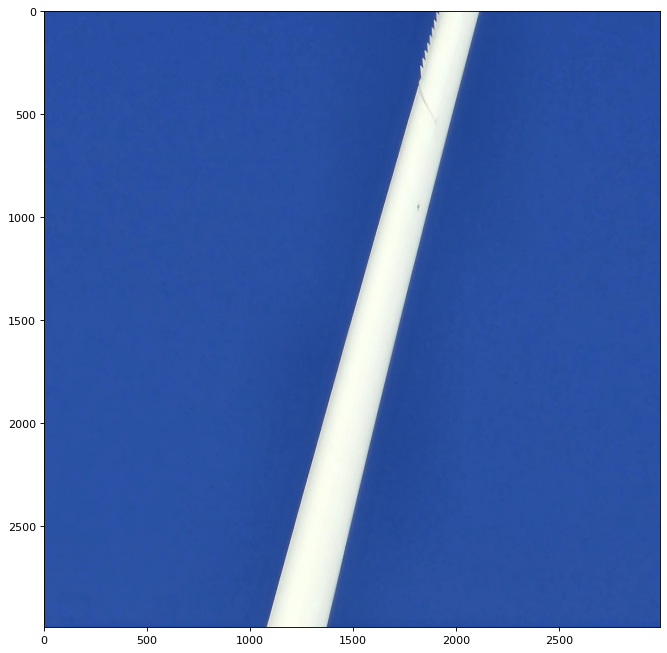

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)

# original_folder = '/content/wind-turbine-damage-challenges/Wind Turbine damage/train'
# for i in range(9):
#   pyplot.subplot(330 + 1 + i)
#   filename = original_folder + 'dog.' + str(i) + '.jpg'
#   plt.axis("off")
image = imread('/content/wind-turbine-damage-challenges/Wind Turbine damage/train/20240120_150738_jpg.rf.88291581b6c6203bcc65c02949da285e.jpg')
pyplot.imshow(image)
pyplot.show()

In [ ]:
import os

source_folder = '/content/wind-turbine-damage-challenges/Wind Turbine damage/train/images/_annotations.coco.json'  # Папка с исходными файлами
destination_folder = '/content/wind-turbine-damage-challenges/Wind Turbine damage/train'  # Папка, куда будем перемещать файлы


# Создаём папку, если она не существует
os.makedirs(destination_folder, exist_ok=True)


In [ ]:
import shutil

files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# Перемещаем каждый файл в destination_folder
# for file in files:
shutil.move( file, os.path.join(destination_folder, file))

'/content/wind-turbine-damage-challenges/Wind Turbine damage/train/images/_annotations.coco.json'

In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 137MB/s]


In [ ]:
# Данные для файла .yaml
yaml_content = """
train: /content/drive/MyDrive/wind-turbine-damage-challenges/Wind Turbine damage/train
val: /content/drive/MyDrive/wind-turbine-damage-challenges/Wind Turbine damage/valid

nc: 5

names:
  0: corrosion
  1: lightning
  2: lightning receptor
  3: missing teeth
  4: patch

"""

# Создание и запись в .yaml файл
with open('data.yaml', 'w') as f:
    f.write(yaml_content)


In [ ]:
import os
import json
from tqdm import tqdm
from pathlib import Path
from PIL import Image

# Путь к папке с изображениями и COCO-аннотацией
coco_annotation_path = '/content/wind-turbine-damage-challenges/Wind Turbine damage/train/_annotations.coco.json'  # или train/_annotations.coco.json
images_dir = '/content/wind-turbine-damage-challenges/Wind Turbine damage/train'  # или train/

# Папка куда сохранить YOLO разметку
labels_dir = os.path.join(images_dir, 'labels')
os.makedirs(labels_dir, exist_ok=True)

# Загружаем COCO json
with open(coco_annotation_path, 'r') as f:
    coco = json.load(f)

# Строим индекс изображений
image_id_to_filename = {img['id']: img['file_name'] for img in coco['images']}
image_id_to_size = {img['id']: (img['width'], img['height']) for img in coco['images']}

# Группируем аннотации по изображениям
from collections import defaultdict
image_id_to_annotations = defaultdict(list)
for ann in coco['annotations']:
    image_id_to_annotations[ann['image_id']].append(ann)


# Проходим по всем изображениям
for image_id, filename in tqdm(image_id_to_filename.items(), desc="Converting"):
    w, h = image_id_to_size[image_id]
    anns = image_id_to_annotations[image_id]

    label_file = os.path.join(labels_dir, Path(filename).stem + '.txt')
    with open(label_file, 'w') as f:
        for ann in anns:
            bbox = ann['bbox']
            category_id = ann['category_id'] - 1

            # Перевод в YOLO-формат
            x_min, y_min, width, height = bbox
            x_center = (x_min + width / 2) / w
            y_center = (y_min + height / 2) / h
            width /= w
            height /= h

            # Сохраняем: class_id x_center y_center width height
            f.write(f"{category_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")


Converting: 100%|██████████| 1070/1070 [00:00<00:00, 12761.26it/s]


In [ ]:
import shutil

# Путь к директории
dir_path = '/content/wind-turbine-damage-challenges/Wind Turbine damage/valid/images/labels'

# Удаление директории с содержимым
# os.rmdir(dir_path)

shutil.rmtree(dir_path)


In [ ]:
model.train(
    data='/content/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    flipud=0.5,      # вертикальное отражение
    fliplr=0.5,      # горизонтальное отражение
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    mosaic=1.0,
    mixup=0.2,       # смешение изображений
    copy_paste=0.2,  # копирование объектов
    augment=True,
    patience=5
)

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.2, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=/content/drive/MyDrive/runs/detect/train/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0

100%|██████████| 755k/755k [00:00<00:00, 24.0MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

 22        [15, 18, 21]  1    752287  ultralytics.nn.modules.head.Detect           [5, [64, 128, 256]]           
Model summary: 129 layers, 3,011,823 parameters, 3,011,807 gradients, 8.2 GFLOPs

Transferred 70/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 94.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 1.4±0.8 MB/s, size: 984.4 KB)


train: Scanning /content/drive/MyDrive/wind-turbine-damage-challenges/Wind Turbine damage/train/labels... 11 images, 5 backgrounds, 0 corrupt:  42%|████▏     | 11/26 [00:06<00:10,  1.49it/s]

In [ ]:
import os

# Путь к папке с лейблами
label_folder = '/content/wind-turbine-damage-challenges/Wind Turbine damage/train/labels'

# Проходим по всем .txt файлам с лейблами
for file in os.listdir(label_folder):
    if file.endswith('.txt'):
        label_file_path = os.path.join(label_folder, file)
        with open(label_file_path, 'r') as f:
            lines = f.readlines()
            if len(lines) == 0:  # Пустой файл
                print(f"Empty label file: {file}")
            else:
                # Проверка на строки, содержащие некорректные данные (например, только пробелы)
                for line in lines:
                    if line.strip() == "":  # Пустая строка
                        print(f"Empty line found in {file}")


Empty label file: 20240120_161016-0-_jpg.rf.05cab211d0a42732a85bcef245c19076.txt
Empty label file: 20240120_155211_mp4-0159_jpg.rf.1aa64ce4e5a50fdd3a2bd20a72d75d8a.txt
Empty label file: 20240120_153836_jpg.rf.d09d2c48f85fc2d9df1795d7047d662b.txt
Empty label file: 20240120_155211_mp4-0016_jpg.rf.d3ded2f252e14baba60156d0f6ef1148.txt
Empty label file: DJI_0784_JPG.rf.6beb83204152e817d90ea051ba195706.txt
Empty label file: 20240120_160633_jpg.rf.eda5afbee418f9aa04765beaccfb9038.txt
Empty label file: 20240120_155211_mp4-0121_jpg.rf.8aa7f0ca3493176b356f190d9034315f.txt
Empty label file: DJI_0356_JPG.rf.f025879416430776fb08e2f9df2c7ecc.txt
Empty label file: 20240120_155211_mp4-0116_jpg.rf.00b312e13ce02ebb4d4bc95f0ee403b2.txt
Empty label file: 20240120_153602_jpg.rf.85661d6881ebbe8e105358916828b5eb.txt
Empty label file: DJI_0403_JPG.rf.1db7b6127ce0b9e2da8a5ef15c8a7011.txt
Empty label file: 20240120_155211_mp4-0123_jpg.rf.46782dab431e8912df59b197188f6346.txt
Empty label file: 20240120_155211_mp4

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Делаем предсказания на тестовых изображениях
results = model.predict(source='/content/wind-turbine-damage-challenges/Wind Turbine damage/test', save=True, imgsz=640)


image 1/151 /content/wind-turbine-damage-challenges/Wind Turbine damage/test/20240120_150729_jpg.rf.5925f54483de8cc52f75fdd1dc0ec3a0.jpg: 640x640 (no detections), 7.5ms
image 2/151 /content/wind-turbine-damage-challenges/Wind Turbine damage/test/20240120_153628_jpg.rf.67030e3c4592587d26d7762e8e091020.jpg: 640x640 (no detections), 7.5ms
image 3/151 /content/wind-turbine-damage-challenges/Wind Turbine damage/test/20240120_153658_jpg.rf.66dc04dc4ee8194ccc19397d4ad42f2e.jpg: 640x640 (no detections), 7.5ms
image 4/151 /content/wind-turbine-damage-challenges/Wind Turbine damage/test/20240120_153711_jpg.rf.3a50aa9daa881abe4296c7f12b03fcf9.jpg: 640x640 (no detections), 7.5ms
image 5/151 /content/wind-turbine-damage-challenges/Wind Turbine damage/test/20240120_153748-0-_jpg.rf.6c50a8089bf3ccd32bb61e347e9f4019.jpg: 640x640 (no detections), 7.5ms
image 6/151 /content/wind-turbine-damage-challenges/Wind Turbine damage/test/20240120_153754_jpg.rf.01e099db13ef7c0beee133daa6379466.jpg: 640x640 (no d

In [ ]:
import os

# Папка с результатами предсказаний
predict_folder = '/content/runs/detect/predict/'

# Открываем файл для записи сабмита
with open('/submission.csv', 'w') as f:
    # Проходим по всем файлам в папке с результатами
    for file in os.listdir(predict_folder):
        # if file.endswith('.txt'):
            image_name = file.replace('.txt', '.jpg')  # Имена файлов совпадают, только расширения разные
            with open(os.path.join(predict_folder, file), 'r') as pred_file:
                print(pred_file)
                for line in pred_file:
                    # print(image_name)
                    # Формируем строку для сабмита
                    f.write(f"{image_name} {line}")


<_io.TextIOWrapper name='/content/runs/detect/predict/20240120_155211_mp4-0194_jpg.rf.d159889f8505128041a06c158de5722c.jpg' mode='r' encoding='utf-8'>


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [ ]:
import os
import pandas as pd
from ultralytics import YOLO

# Загружаешь модель
model = YOLO('/content/drive/MyDrive/runs/detect/train/weights/best.pt')

# Путь к тестовой папке с изображениями
test_dir = '/content/wind-turbine-damage-challenges/Wind Turbine damage/test'
image_files = sorted([f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.png'))])

# Получаем предсказания
results = model([os.path.join(test_dir, f) for f in image_files], conf=0.25)

submission = []

for img_file, r in zip(image_files, results):
    pred_str = ''
    boxes = r.boxes

    if boxes is not None and len(boxes) > 0:
        for cls, conf, xyxy in zip(boxes.cls, boxes.conf, boxes.xyxy):
            cls = int(cls.item())
            conf = round(conf.item(), 4)
            xyxy = xyxy.tolist()
            pred_str += f'{cls} {conf} {" ".join([str(round(x, 2)) for x in xyxy])} '
        pred_str = pred_str.strip()

    submission.append({
        'image_id': os.path.basename(img_file),
        'objects': pred_str
    })

# Сохраняем в CSV
df = pd.DataFrame(submission)
df.to_csv('submission.csv', index=False)


In [ ]:
import os
import pandas as pd
from ultralytics import YOLO
import json

# Словарь для перевода class_id → имя категории
CATEGORY_NAMES = {
    0: "corrosion",
    1: "lightning",
    2: "lightning receptor",
    3: "missing teeth",
    4: "patch"
}

# Загружаешь модель
model = YOLO('/content/drive/MyDrive/runs/detect/train/weights/best.pt')

# Путь к тестовой папке с изображениями
test_dir = '/content/wind-turbine-damage-challenges/Wind Turbine damage/test'
image_files = sorted([f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.png'))])

# Получаем предсказания
results = model([os.path.join(test_dir, f) for f in image_files], conf=0.25)

submission = []

for img_file, r in zip(image_files, results):
    pred_str = []
    boxes = r.boxes

    if boxes is not None and len(boxes) > 0:
        for cls, conf, xyxy in zip(boxes.cls, boxes.conf, boxes.xyxy):
            cls = int(cls.item())
            conf = round(conf.item(), 4)
            xyxy = xyxy.tolist()
            name = CATEGORY_NAMES.get(cls, str(cls))  # Преобразуем class_id в имя категории
            pred_str.append([name, round(xyxy[0], 2), round(xyxy[1], 2), round(xyxy[2], 2), round(xyxy[3], 2), conf])

    # Если нет предсказаний, добавляем пустой список
    if not pred_str:
        pred_str = []

    submission.append({
        'image_id': os.path.basename(img_file),
        'objects': json.dumps(pred_str)  # Преобразуем в строку JSON
    })

# Сохраняем в CSV
df = pd.DataFrame(submission)
out_path = 'submission_reformatted.csv'
df.to_csv(out_path, index=False)




0: 640x640 (no detections), 3.4ms
1: 640x640 (no detections), 3.4ms
2: 640x640 (no detections), 3.4ms
3: 640x640 (no detections), 3.4ms
4: 640x640 (no detections), 3.4ms
5: 640x640 (no detections), 3.4ms
6: 640x640 (no detections), 3.4ms
7: 640x640 (no detections), 3.4ms
8: 640x640 (no detections), 3.4ms
9: 640x640 (no detections), 3.4ms
10: 640x640 (no detections), 3.4ms
11: 640x640 (no detections), 3.4ms
12: 640x640 (no detections), 3.4ms
13: 640x640 (no detections), 3.4ms
14: 640x640 (no detections), 3.4ms
15: 640x640 (no detections), 3.4ms
16: 640x640 (no detections), 3.4ms
17: 640x640 (no detections), 3.4ms
18: 640x640 (no detections), 3.4ms
19: 640x640 (no detections), 3.4ms
20: 640x640 (no detections), 3.4ms
21: 640x640 (no detections), 3.4ms
22: 640x640 (no detections), 3.4ms
23: 640x640 (no detections), 3.4ms
24: 640x640 (no detections), 3.4ms
25: 640x640 (no detections), 3.4ms
26: 640x640 (no detections), 3.4ms
27: 640x640 (no detections), 3.4ms
28: 640x640 (no detections), 